In [21]:
from google.cloud import bigquery
from google.cloud import firestore
import google.cloud.exceptions

import logging
import datetime
import time

import matplotlib.pyplot as plt
from matplotlib_venn import venn3


import pprint
pp = pprint.PrettyPrinter(indent=4)

import os

In [100]:
class coki:
    def __init__(self, dataset, token):
        os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=token
        self.client = bigquery.Client()
        self.dataset_ref = self.client.dataset(dataset)
        self.db = firestore.Client()
    
    def count_dois_from_source(self, source):
        query = """
            SELECT COUNT(DOI)
            FROM `institutions.raw_prod`
            WHERE source = @source
        """
        query_params = [
            bigquery.ScalarQueryParameter('source', 'STRING', source),
        ] 
        job_config = bigquery.QueryJobConfig()
        job_config.query_parameters = query_params
        query_job = self.client.query(
            query,
            # Location must match that of the dataset(s) referenced in the query.
            location='US',
            job_config=job_config)  # API request - starts the query

        # Print the results
        for row in query_job:
            print('{}'.format(row.f0_))

        assert query_job.state == 'DONE'
        
    def plot_overlap_for_institution(self):
        query = """
            SELECT
              grid_id,
              venn,
              COUNT(1) as count
            FROM (SELECT
              grid_id,
              CASE 
                WHEN scopus_month is not null AND wos_month is not null AND msa_month is not null AND year is not null THEN 15

                WHEN scopus_month is not null AND wos_month is not null AND msa_month is not null THEN 14
                WHEN scopus_month is not null AND wos_month is not null AND year is not null THEN 13
                WHEN scopus_month is not null AND msa_month is not null AND year is not null THEN 12
                WHEN msa_month is not null AND wos_month is not null AND year is not null THEN 11

                WHEN msa_month is not null AND scopus_month is not null THEN 10
                WHEN msa_month is not null AND wos_month is not null THEN 9
                WHEN msa_month is not null AND year is not null THEN 8
                WHEN scopus_month is not null AND wos_month is not null THEN 7
                WHEN scopus_month is not null AND year is not null THEN 6
                WHEN wos_month is not null AND year is not null THEN 5

                WHEN msa_month is not null AND wos_month is null AND scopus_month is null AND year is null THEN 4
                WHEN wos_month is not null AND msa_month is null AND scopus_month is null AND year is null THEN 3
                WHEN scopus_month is not null AND wos_month is null AND msa_month is null AND year is null THEN 2
                WHEN year is not null THEN 1

                else 0
              END as venn
              FROM 
                institutions.18_years_with_unpaywall)
            GROUP BY
              venn, grid_id
            ORDER BY
              grid_id, venn
        """
        query_params = [
            bigquery.ScalarQueryParameter('grid_id', 'STRING', 'grid.1032.0'),
        ]
        job_config = bigquery.QueryJobConfig()
        job_config.query_parameters = query_params
        query_job = self.client.query(
            query,
            # Location must match that of the dataset(s) referenced in the query.
            location='US',
            job_config=job_config)  # API request - starts the query

        
        
        
        grids = {}
        
        # Print the results
        for row in query_job:
            # print('{} {}'.format(row.grid_id, row.venn, row.count))
            
            if row.grid_id not in grids:
                grids[row.grid_id] = {}        
            grids[row.grid_id][row.venn] = row.count
        
        
        plt.subplots(figsize=(40,20), dpi=100)
        
        num = 0
        for grid, counts in grids.items():
            num += 1
            
            wos =            counts[3] +  counts[5]
            scopus =         counts[2] +  counts[6]
            msa =            counts[4] +  counts[8]
            wos_scopus =     counts[7] +  counts[13]
            wos_msa =        counts[9] +  counts[11]
            scopus_msa =     counts[10] + counts[12]
            wos_scopus_msa = counts[14] + counts[15]
            
            plt.subplot(4,4, num)
             
            v = venn3(subsets = (wos, scopus, wos_scopus, msa, wos_msa, scopus_msa, wos_scopus_msa), set_labels = ('WoS', 'Scopus', 'MSA'))
            plt.title(grid)
        
        #plt.figure(figsize=(200,100), dpi=200)
        plt.show()

        assert query_job.state == 'DONE'
        
    def scheduler_overview():
        a = 1
        
        # Open Tasks
        
        # Active: Dispatched, Fetched, Parsed,
        
        # Completed
        
        
    def retry_failed_fetches():
        a = 2
    
    def retry_failed_parses():
        a = 3
    
    def retry_failed_loads():
        a = 4
    
    
    def get_results(years, grids):
        a = 5
        
        # BigQuery
        
        # Compact
        
        # Then link to unpaywall

In [101]:
coki_client = coki("institutions", "/Users/277594b/Documents/Projects/COKI/certs/coki-214004-36a73c3216c6.json")

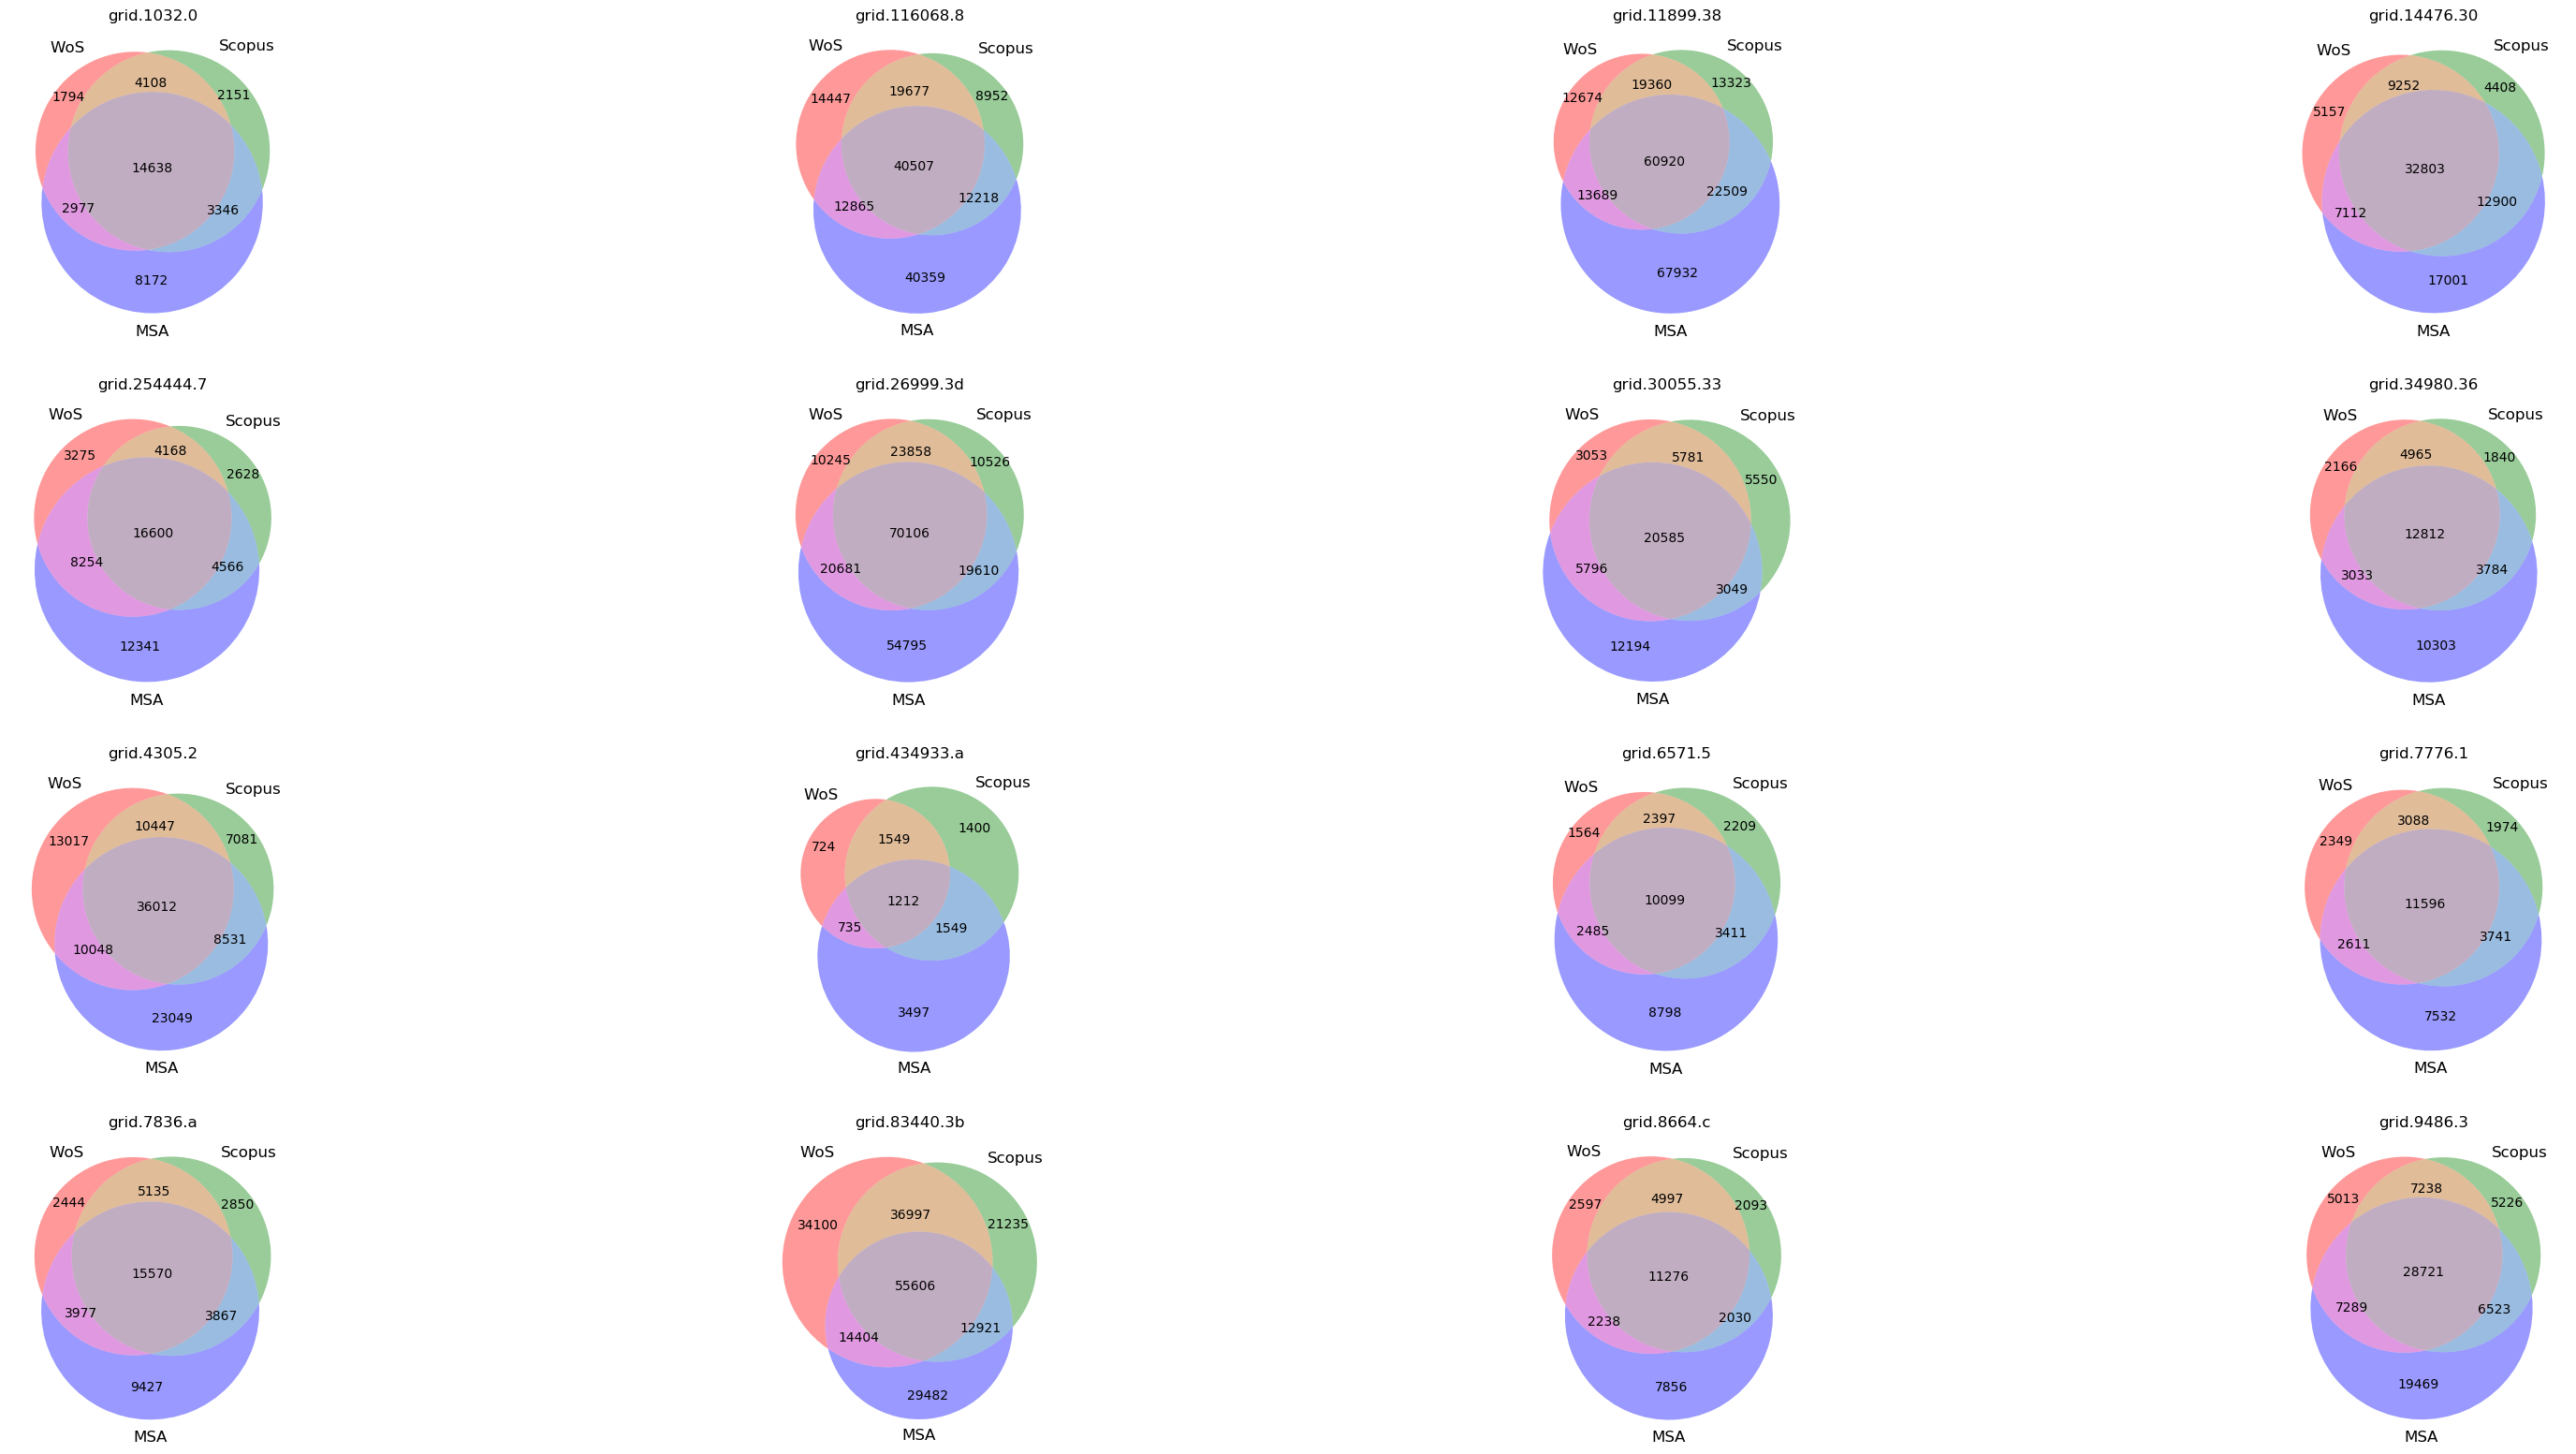

In [102]:
coki_client.plot_overlap_for_institution()